# Multidimensional Scaling

Great circle distances (in kilometres) between some major airports in the northern hemisphere are provided in the following table:

$$
\begin{array}{c|ccccc}
\text{EWR} & 6223 &       &      &      & \\
\text{KEF} & 2151 & 4185  &      &      & \\
\text{LHR} & 981  & 5577  & 1900 &      & \\
\text{NRT} & 8734 & 10833 & 8844 & 9614 & \\
\text{YVR} & 7685 & 3908  & 5702 & 7601 & 7521 \\
\hline
& \text{CPH} & \text{EWR} & \text{KEF} & \text{LHR} & \text{NRT} \\
\end{array}
$$

*Key:* CPH = Copenhagen, EWR = Newark, KEF = Keflavík, LHR = London Heathrow, NRT = Tokyo Narita, YVR = Vancouver.

(a) Use this information to draw a map (a scaled representation in $\mathbb{R}^2$) which displays these airports (and nothing else), representing the distances as faithfully as possible (in relative terms). The orientation of the map can be arbitrary.

(b) How accurate is your map in terms of distances? Can it be perfectly accurate (ignoring rounding errors)?

## (a)

Motivated by Section 1.9.1 of the lecture notes, multidimensional scaling can be applied to this problem. Specifically least squares scaling as it uses dissimilarities.

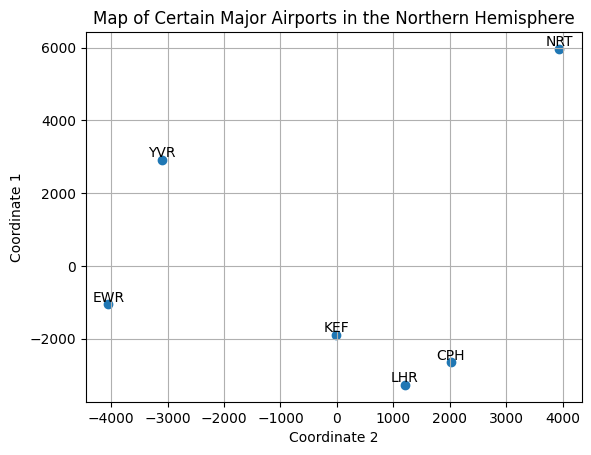

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.manifold import MDS

# Create a geodesic distance matrix
distances = np.array([
    [0,          6223,       2151,       981,        8734,       7685],
    [6223,       0,          4185,       5577,       10833,      3908],
    [2151,       4185,       0,          1900,       8844,       5702],
    [981,        5577,       1900,       0,          9614,       7601],
    [8734,       10833,      8844,       9614,       0,          7521],
    [7685,       3908,       5702,       7601,       7521,       0]
])

# Initialise MDS and apply to the geodesic distances
mds = MDS(n_components=2, random_state=123, dissimilarity='precomputed')
coords = mds.fit_transform(distances)

# Draw a map in R2
airports = ['CPH', 'EWR', 'KEF', 'LHR', 'NRT', 'YVR']
plt.scatter(coords[:, 1], coords[:, 0])
for i, airport in enumerate(airports):
    plt.text(coords[i, 1], coords[i, 0], airport, ha='center', va='bottom')
plt.title('Map of Certain Major Airports in the Northern Hemisphere')
plt.xlabel('Coordinate 2')
plt.ylabel('Coordinate 1')
plt.grid(True)
plt.show()

## (b)

Stress quantifies the accuracy of the map in terms of distances, which is defined as

$$
S_M (\pmb{z}_1, \ldots, \pmb{z}_n) = \sum_{i \neq j} \left( d_{i,j} - \|\pmb{z}_i - \pmb{z}_j\| \right)^2
$$

where $\pmb{z}_1, \ldots, \pmb{z}_n$ are the lower dimensional mappings of the samples $\pmb{x}_1, \ldots, \pmb{x}_n$ and $d_{i,j}, \, i, j = 1, \ldots, n$ is the dissimilarity between sample $\pmb{x}_i$ and $\pmb{x}_j$.

In [2]:
print('Stress value:', mds.stress_, 'km^2')

Stress value: 150881.489982499 km^2


**NOTE:** `sklearn.manifold.MDS` defines stress slightly differently to the lecture notes. Specifically,

$$
S_M (\pmb{z}_1, \ldots, \pmb{z}_n) = \frac {1} {2} \sum_{i \neq j} \left( d_{i,j} - \|\pmb{z}_i - \pmb{z}_j\| \right)^2.
$$

To answer the question at a more granular level, the percentage differences between the Euclidean distances in the 2-dimensional map and the geodesic distances are also calculated.

In [3]:
from sklearn.metrics import euclidean_distances

euclidean_distances = euclidean_distances(coords)
percentage_differences = np.zeros_like(euclidean_distances)

for i in range(len(distances)):
    for j in range(len(distances)):
        if i != j:
            percentage_differences[i, j] = (euclidean_distances[i, j] - distances[i, j]) / distances[i, j] * 100

print(percentage_differences)

[[ 0.          0.81820853  0.74013311  4.39243923  1.0645146  -1.49999588]
 [ 0.81820853  0.         -1.45691111  2.21484327 -1.78207222  4.65988629]
 [ 0.74013311 -1.45691111  0.         -3.24784987 -0.56440142  0.33879986]
 [ 4.39243923  2.21484327 -3.24784987  0.          0.19416736 -0.75090734]
 [ 1.0645146  -1.78207222 -0.56440142  0.19416736  0.          2.08334565]
 [-1.49999588  4.65988629  0.33879986 -0.75090734  2.08334565  0.        ]]


The accuracy of the map in terms of distances cannot be perfectly accurate.

Let $S$ denote the surface of Earth, and let $M$ denote a 2-dimensional representation of $S$.

$S$ is a 2-dimensional manifold embedded in $\mathbb{R}^3$, meaning that the distance metric cannot be Euclidean distance. $M$ is a 2-dimensional Euclidean space, meaning that the distance metric can be Euclidean distance.

Suppose there exists a projection $P: S \rightarrow M$ that preserves all geodesic distances. However, this would imply that the distance metric on $S$ (the geodesic distance) is isometrically equivalent to the distance metric on $M$ (the Euclidean distance), which is impossible due to the non-Euclidean nature of $S$.

By contradiction, we have proven that the accuracy of the map in terms of distances cannot be perfectly accurate.